## Redes Neurais e Algoritmos Genéticos
### Atividade: Monstrinho 6
### Trio: Diogo Carvalho, José David e Mayllon Emmanoel

### Novas funções de ativação escolhidas

#### Hyperbolic tangent (Tanh)

A "Hyperboic tagent (tanh) function" ou função de ativação da tangente hiperbólica é um modelo matemático usado em redes neurais. Essa função pode ser considerada uma extensão da função sigmoide e coloca os valores num intervalo entre -1 e 1 [1]. A expressão matemática que representa esse tipo de função pode ser vista abaixo. 

$$
\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$


Abaixo, implementamos a função no python e testamos com valores gerados num array espaçado linearmente para uma melhor visualização do gráfico 

In [1]:
import math
import numpy as np

def tanh(z):
    return (math.exp(z) - math.exp(-z))/(math.exp(z)+math.exp(-z))

In [2]:
tanh(1)

0.7615941559557649

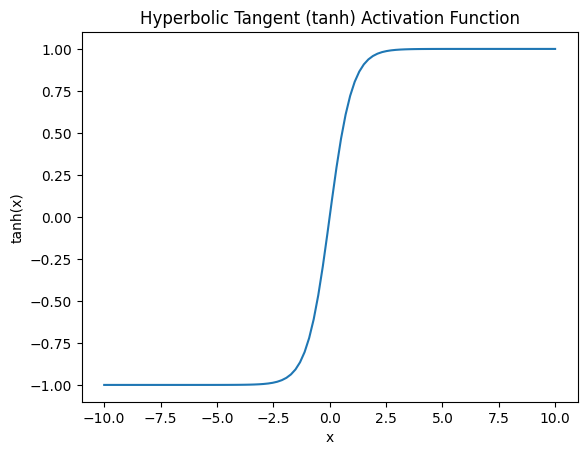

In [3]:
import matplotlib.pyplot as plt

def plot_tanh():
    
    x = np.linspace(-10, 10, 100)
    
    tanh = np.tanh(x)
    
    plt.plot(x, tanh)
    plt.title("Hyperbolic Tangent (tanh) Activation Function")
    plt.xlabel("x")
    plt.ylabel("tanh(x)")
    
plot_tanh()
plt.show()

    
    

#### Rectified Linear Unit (ReLU)

O "Rectified Linear Unit (ReLu) activation function" ou apenas função de ativação Rectified Linear Unit (ReLU) é também um modelo matemático muito utilizado nas redes neurais. Essa função aplica um thresholding aos valores do inout, transformando valores negativos para zero e deixando os valores positivos intactos. ReLu tem se tornado bastante popular e é muito usada em arquiteturas de deep learning devido a sua habilidade de "aliviar" o vanishing gradient e promover uma convergência mais rápida durante o treino [1].

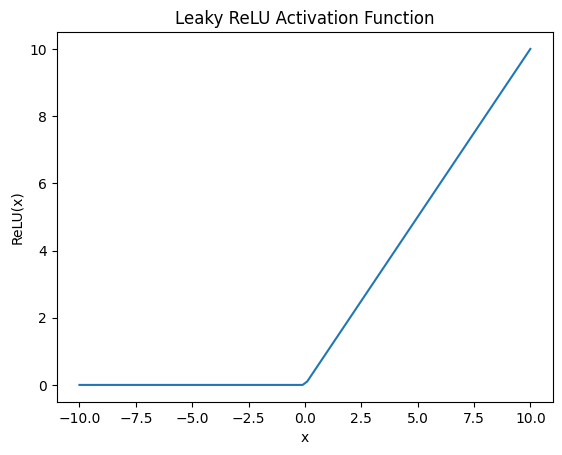

In [4]:
def ReLU(z):
    return max(0,z)

def plot_ReLU():
    
    x = np.linspace(-10, 10, 100)
    
    relu = np.maximum(0,x)
    
    plt.plot(x, relu)
    plt.title("Leaky ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("ReLU(x)")
    
plot_ReLU()
plt.show()

    
    

#### Leakly ReLU 

Seguindo a mesma lógica apresentada na função anterior, a função "Leakly ReLU" é uma extensão da ReLU. Assim como sua "função mãe" a Leakly ReLU aplica um thresholding nos valores do input e também mudando os valores negativos para zero, porém, diferentemente do ReLU, o Leakly ReLU permite um pequeno gradiente "non-zero", o que ajuda a resolver alguns problemas relacionados ao algoritimo do ReLU

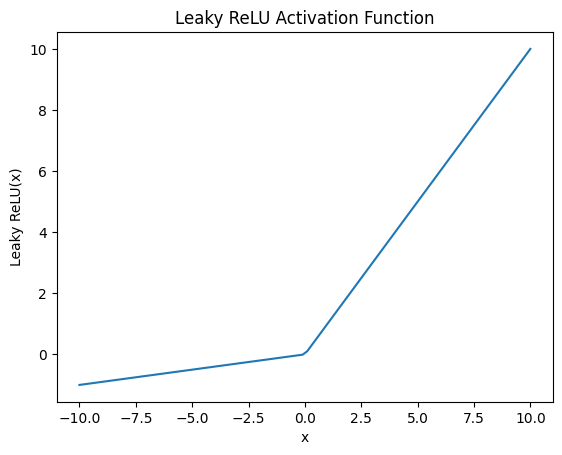

In [5]:
def Wk_ReLU(z, alpha=0.1):
    return max(z, alpha*z)

def plot_Wk_ReLU():
    
    x = np.linspace(-10, 10, 100)
    
    def leaky_relu(x, alpha=0.1):
        return np.where(x >= 0, x, alpha * x)
    
    leaky_relu_values = leaky_relu(x)
    
    plt.plot(x, leaky_relu_values)
    plt.title("Leaky ReLU Activation Function")
    plt.xlabel("x")
    plt.ylabel("Leaky ReLU(x)")
    
plot_Wk_ReLU()
plt.show()

    
    

### Implementando na Rede Neural

Nas alterações abaixo, implementamos métodos que relacionados as funções de ativação escolhidas e fizemos alterações na classe MLP para adicionar um parâmetro de escolha da função de ativação

In [6]:
import math

class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"
    
    def __add__(self, outro_valor):
        """Realiza a operação: self + outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data + outro_valor.data
        operador_mae = "+"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_adicao():
            self.grad += resultado.grad
            outro_valor.grad += resultado.grad
            
        resultado.propagar = propagar_adicao
        
        return resultado
    
    def __mul__(self, outro_valor):
        """Realiza a operação: self * outro_valor."""
        
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
            
        progenitor = (self, outro_valor)
        data = self.data * outro_valor.data
        operador_mae = "*"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_multiplicacao():
            self.grad += resultado.grad * outro_valor.data # grad_filho * derivada filho em relação a mãe
            outro_valor.grad += resultado.grad * self.data
            
        resultado.propagar = propagar_multiplicacao
        
        return resultado
    
    def exp(self):
        """Realiza a operação: exp(self)"""
        progenitor = (self, )
        data = math.exp(self.data)
        operador_mae = "exp"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_exp():
            self.grad += resultado.grad * data 
        
        resultado.propagar = propagar_exp
        
        return resultado
    
    def __pow__(self, expoente):
        """Realiza a operação: self ** expoente"""
        assert isinstance(expoente, (int, float))
        progenitor = (self, )
        data = self.data ** expoente
        operador_mae = f"**{expoente}"
        resultado = Valor(data, progenitor, operador_mae)
        
        def propagar_pow():
            self.grad += resultado.grad * (expoente * self.data ** (expoente - 1))
        
        resultado.propagar = propagar_pow
        
        return resultado
    
    def __truediv__(self, outro_valor):
        """Realiza a operação: self / outro_valor"""
        return self * outro_valor ** (-1)
    
    def __neg__(self):
        """Realiza a operação: -self"""
        return self * -1
    
    def __sub__(self, outro_valor):
        """Realiza a operação: self - outro_valor"""
        return self + (-outro_valor)
    
    def __radd__(self, outro_valor):
        """Realiza a operação: outro_valor + self"""
        return self + outro_valor
    
    def __rmul__(self, outro_valor):
        """Realiza a operação: outro_valor * self"""
        return self * outro_valor
    
    def sig(self):
        """Realiza a operação: exp(self) / (exp(self) + 1)"""
        return self.exp() / (self.exp() + 1)
    
    def tanh(z):
        return (math.exp(z) - math.exp(-z))/(math.exp(z)+math.exp(-z))
    
    def ReLU(z):
        return max(0,z)
    
    def Wk_ReLU(z, alpha=0.1):
        return max(z, alpha*z)

    
    def propagar(self):
        pass
    
    def propagar_tudo(self):
        
        self.grad = 1
        
        ordem_topologica = []
        
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)
        
        for vertice in reversed(ordem_topologica):
            vertice.propagar()

In [7]:
import random

class Neuronio:
    def __init__(self, num_neuronios, num_dados_entrada, funcao_ativacao):
        neuronios = []
        
        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada, funcao_ativacao)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params
    



In [8]:
class Camada:
    def __init__(self, num_neuronios, num_dados_entrada):
        neuronios = []
        
        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

In [9]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada, funcao_ativacao):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        
        camadas = []
        
        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(num_neuronios_por_camada[i], percurso[i], funcao_ativacao)
            camadas.append(camada)
            
        self.camadas = camadas
        
    def __call__(self, x):
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        
        for camada in self.camadas:
            parametros_camada = camada.parametros()
            params.extend(parametros_camada)
            
        return params

class Camada:
    def __init__(self, num_neuronios, num_dados_entrada, funcao_ativacao):
        neuronios = []
        
        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada, funcao_ativacao)
            neuronios.append(neuronio)
            
        self.neuronios = neuronios     
        
    def __call__(self, x):
        dados_de_saida = []
        
        for neuronio in self.neuronios:
            informacao = neuronio(x)
            dados_de_saida.append(informacao)
            
        if len(dados_de_saida) == 1:
            return dados_de_saida[0]
        else:        
            return dados_de_saida  
    
    def parametros(self):
        params = []
        
        for neuronio in self.neuronios:
            params_neuronio = neuronio.parametros()
            params.extend(params_neuronio)
        
        return params

class Neuronio:
    def __init__(self, num_dados_entrada, funcao_ativacao):
        self.vies = Valor(random.uniform(-1, 1))
        
        self.pesos = []
        for i in range(num_dados_entrada):
            self.pesos.append(Valor(random.uniform(-1, 1)))
            
        self.funcao_ativacao = funcao_ativacao
        
    def __call__(self, x):
        assert len(x) == len(self.pesos)
        
        soma = 0
        for info_entrada, peso_interno in zip(x, self.pesos):
            soma += info_entrada * peso_interno
            
        soma += self.vies  
        dado_de_saida = self.funcao_ativacao(soma)
        
        return dado_de_saida       
    
    def parametros(self):
        return self.pesos + [self.vies]

# Funções de ativação

def sigmoid(z):
    """Função sigmoidal"""
    return 1 / (1 + math.exp(-z))

def relu(z):
    """Unidade Linear Retificada (ReLU)"""
    return max(0, z)

def tanh(z):
    """Tangente hiperbólica"""
    return math.tanh(z)


mlp_sigmoid = MLP(num_dados_entrada=2, num_neuronios_por_camada=[3, 4, 1], funcao_ativacao=sigmoid)
mlp_relu = MLP(num_dados_entrada=2, num_neuronios_por_camada=[3, 4, 1], funcao_ativacao=relu)
mlp_tanh = MLP(num_dados_entrada=2, num_neuronios_por_camada=[3, 4, 1], funcao_ativacao=tanh)


In [10]:
mlp_sigmoid

### Referências

[1] https://tariqueakhtar-39220.medium.com/python-implementation-of-activation-function-for-neural-network-cb38fe735c9e

[2] https://paperswithcode.com/method/tanh-activation

[1]: https://tariqueakhtar-39220.medium.com/python-implementation-of-activation-function-for-neural-network-cb38fe735c9e